In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp
import networkx as nx
import random
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.isomorphism.isomorph import (
    graph_could_be_isomorphic as isomorphic)
auth_df = auth_df[auth_df['doi'].notnull()]
author_papers = auth_df[auth_df['authorid'].notnull()]
authors_df = author_papers[['authorid', 'indexed_name', 'forename']].drop_duplicates(subset=['authorid'])
int_p_id = dict(enumerate(list(author_papers['doi'].unique())))
int_a_id = dict(enumerate(list(author_papers['authorid'].unique())))
a_int_id = {authorId:intVal for intVal,authorId in int_a_id.items()}
p_int_id = {paperId:intVal for intVal,paperId in int_p_id.items()}
author_paper_tuples = list(zip(author_papers['authorid'], author_papers['doi']))
author_paper_tuples = [(a_int_id[t[0]],p_int_id[t[1]]) for t in author_paper_tuples]
AP = sp.csc_matrix((np.ones(len(author_paper_tuples)), zip(*author_paper_tuples)))
AA = AP.dot(AP.T)
AA = np.array(AA - np.diag(AA.diagonal()))
G = nx.from_numpy_matrix(AA, parallel_edges=True)
deg_measure = nx.degree(G) 
cent_measure = nx.degree_centrality(G) 
bet_measure = nx.betweenness_centrality(G)
authors_df['degree'] = authors_df['authorid'].apply(lambda l: deg_measure[a_int_id.get(l)])
authors_df['degree_cent'] = authors_df['authorid'].apply(lambda l: cent_measure[a_int_id.get(l)])
authors_df['degree_bet'] = authors_df['authorid'].apply(lambda l: bet_measure.get(a_int_id.get(l)))

In [3]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
print('Edges in entire network: ' + str(G.number_of_edges()))
print('Nodes in entire network: ' + str(G.number_of_nodes()))
print('Density of entire network: ' + str(nx.density(G)))
print('Edges in Giant Component: ' + str(G.subgraph(Gcc[0]).number_of_edges()))
print('Nodes in Giant Component: ' + str(G.subgraph(Gcc[0]).number_of_nodes()))
print('Density of Giant Component: ' + str(nx.density(G.subgraph(Gcc[0]))))

Edges in entire network: 2317
Nodes in entire network: 2026
Density of entire network: 0.0011295138508037488
Edges in Giant Component: 926
Nodes in Giant Component: 433
Density of Giant Component: 0.009900778376528955


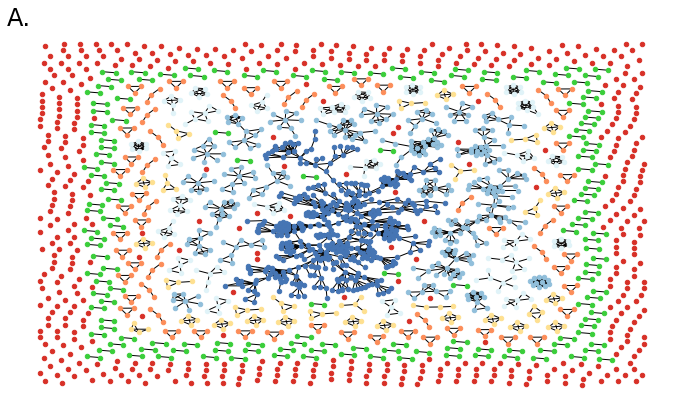

In [4]:
fig, ax = plt.subplots(figsize=(12, 7))
pos = graphviz_layout(G, prog="neato")
C = (G.subgraph(c) for c in nx.connected_components(G))
colors1 = ['#d73027', '#3ace3a', '#fc8d59', '#fee090', '#e0f3f8', '#91bfdb', '#4575b4']
for g in C:
    c = [random.random()] * nx.number_of_nodes(g)  # random color...
    if nx.number_of_nodes(g) == 1:
        c = colors1[0]
    elif nx.number_of_nodes(g) == 2:
        c = colors1[1]
    elif nx.number_of_nodes(g) == 3:
        c = colors1[2]
    elif nx.number_of_nodes(g) == 4:
        c = colors1[3]
    elif (nx.number_of_nodes(g)>4) and nx.number_of_nodes(g)<8:
        c = colors1[4]
    elif (nx.number_of_nodes(g)>7) and nx.number_of_nodes(g)<400:
        c = colors1[5]
    elif (nx.number_of_nodes(g)>400):
        c = colors1[6]
    nx.draw(g, pos, node_size=20, node_color=c, vmin=0.0, vmax=1.0, with_labels=False, ax=ax)
ax.set_title('A.', fontsize=24, loc='left', y=0.98, x=0)
fig_path = os.path.join(os.getcwd(), '..', 'article', 'figures')
plt.savefig(os.path.join(fig_path, 'networks.pdf'),
            bbox_inches='tight')
plt.savefig(os.path.join(fig_path, 'networks.png'),
            bbox_inches='tight', dpi=600)
plt.savefig(os.path.join(fig_path, 'networks.svg'),
            bbox_inches='tight')
plt.show()

In [6]:
authors_df

,authorid,indexed_name,forename,degree,degree_cent,degree_bet
0,4.286145e+10,Grippo F.,Francesco,5,0.002469,0.000000
1,7.004277e+09,Pappagallo M.,Marilena,5,0.002469,0.000000
2,6.602395e+09,Frova L.,Luisa,5,0.002469,0.000000
3,1.505158e+10,Desesquelles A.,Aline,5,0.002469,0.000000
4,6.701683e+09,Mesle F.,France,11,0.005432,0.000206
...,...,...,...,...,...,...
3443,1.664874e+10,Burt C.,Cyril,0,0.000000,0.000000
3444,5.693002e+10,Blackburn J.,Julian,0,0.000000,0.000000
3445,5.719831e+10,Vincent P.E.,Paul E.,0,0.000000,0.000000
3448,5.547195e+10,Marshall J.T.,NaN,0,0.000000,0.000000
